In [1]:
from typing import Annotated, TypedDict,Sequence, Literal, Optional
from langgraph.graph import add_messages
from dotenv import load_dotenv
import os
from openai import OpenAI
from langgraph.prebuilt import ToolNode
from langchain_core.tools import tool
from langchain_core.messages import BaseMessage, SystemMessage, ToolMessage
from langgraph.graph import StateGraph, START, END

<img src="https://github.com/dv-learn/langgraph-journey-sam/blob/main/images/Episode1_Sam_Arrives_To_Village.jpg?raw=true" alt="Image of Sam Arrives to Village!"/>

In [2]:
# environment

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
os.environ['ANTHROPIC_API_KEY'] = os.getenv('ANTHROPIC_API_KEY', 'your-key-if-not-using-env')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')

In [3]:
from typing import TypedDict, Optional

# This schema tracks all messages exchanged among nodes, ‚Äî like a running conversation log.
class SamState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [4]:
def greeting_node(state: SamState)-> SamState:
    """ This node responds with a friendly greeting and some guidance for anyone in village"""

    greeting_message = """
Welcome to Harmonyville, traveler!
I‚Äôm the village greeter ‚Äî here to help you find your way. If you're new, here's how things work around here:

If you‚Äôre unsure what to do or need guidance, speak with our kind **Librarian**. She‚Äôs wise and always ready to help.

Curious about the weather before planning something big? Our **Weather Station** expert has the latest forecast!

Need approval for an event or announcement? Our cheerful **Mayor** will give you the green (or red) signal.

Just ask your question, and our town will work together to help you out.

Let‚Äôs begin your journey ‚Äî what would you like to do today?
"""
    
    return {
        "messages": [AIMessage(content=greeting_message)]
    }

In [5]:
# We add our greeting node and make it the starting point of our graph.
graph = StateGraph(SamState)
graph.add_node("greeting", greeting_node)
graph.add_edge("greeting",END)
graph.set_entry_point("greeting")

app = graph.compile()



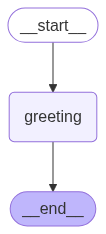

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
from langchain_core.messages import HumanMessage, AIMessage


# Start with Sam‚Äôs first message
user_input = input("\nüë§ Sam: ")
messages = [HumanMessage(content=user_input)]

while True:
    # üîÅ Invoke LangGraph app with current conversation
    state = app.invoke({"messages": messages})

    # üÜï Extract only new messages added during this invoke
    new_messages = [msg for msg in state["messages"] if msg not in messages]

    # üí¨ Print assistant/tool responses
    for msg in new_messages:
        role = (
            "üîß Tool" if hasattr(msg, "tool_call_id")
            else "üßë‚Äçüè´ Assistant" if isinstance(msg, AIMessage)
            else "‚ùì"
        )
        print(f"{role}: {msg.content}")

    # üß† Update message history with new messages from state
    messages += new_messages

    # üßë Prompt for next Sam message (or exit)
    user_input = input("\nüë§ Sam: ")
    if user_input.lower() in ["exit", "quit"]:
        break

    # ‚ûï Append user input
    messages.append(HumanMessage(content=user_input))



üë§ Sam:  Hi I am Sam.


üßë‚Äçüè´ Assistant: 
Welcome to Harmonyville, traveler!
I‚Äôm the village greeter ‚Äî here to help you find your way. If you're new, here's how things work around here:

If you‚Äôre unsure what to do or need guidance, speak with our kind **Librarian**. She‚Äôs wise and always ready to help.

Curious about the weather before planning something big? Our **Weather Station** expert has the latest forecast!

Need approval for an event or announcement? Our cheerful **Mayor** will give you the green (or red) signal.

Just ask your question, and our town will work together to help you out.

Let‚Äôs begin your journey ‚Äî what would you like to do today?




üë§ Sam:  exit
